 use keras to build neural networks. And by completing five **tasks**, gain some insights behind the expressive power of neural networks.


In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

2023-11-18 12:29:45.063423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Problem #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \in \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \in \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer

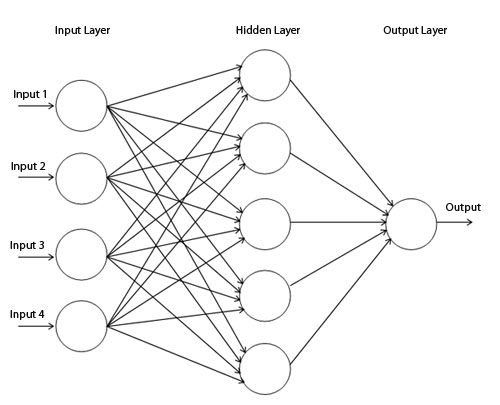

1. **Task 1**: write down the expression form for y=f(x)

Simpler version of the answer, considering bias and activation function, would be:


𝑦=𝑣(𝜙ℎ(𝐮ℎ𝐱+𝑎))+𝑏. 



Below, I showcase how different weights are considered with respect to each hidden node. 



H1 = u11x1 + u21x2 + u31x3 + u41x4

H2 = u12x1 + u22x2 + u32x3 + u42x4

H3 = u13x1 + u23x2 + u33x3 + u43x4

H4 = u14x1 + u24x2 + u34x3 + u44x4

H5 = u15x1 + u25x2 + u35x3 + u45x4

y = v11H1 + v12H2 + v13H3 + v14H4 + v15H5

y = v11 (u11x1 + u21x2 + u31x3 + u41x4) + v12 (u12x1 + u22x2 + u32x3 + u42x4) +
    v13 (u13x1 + u23x2 + u33x3 + u43x4) + v14 (u14x1 + u24x2 + u34x3 + u44x4) +
    v15 (u15x1 + u25x2 + u35x3 + u45x4)

y = (v11u11 + v12u12 + v13u13 + v14u14 + v15u15)x1 +
    (v11u21 + v12u22 + v13u23 + v14u24 + v15u25)x2 +
    (v11u31 + v12u32 + v13u33 + v14u34 + v15u35)x3 +
    (v11u41 + v12u42 + v13u43 + v14u44 + v15u45)x4 
    

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on the selection of model architectures sucg as activation function for each node, hidden layer size, the number of layers and etc. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer) or deep-wide?


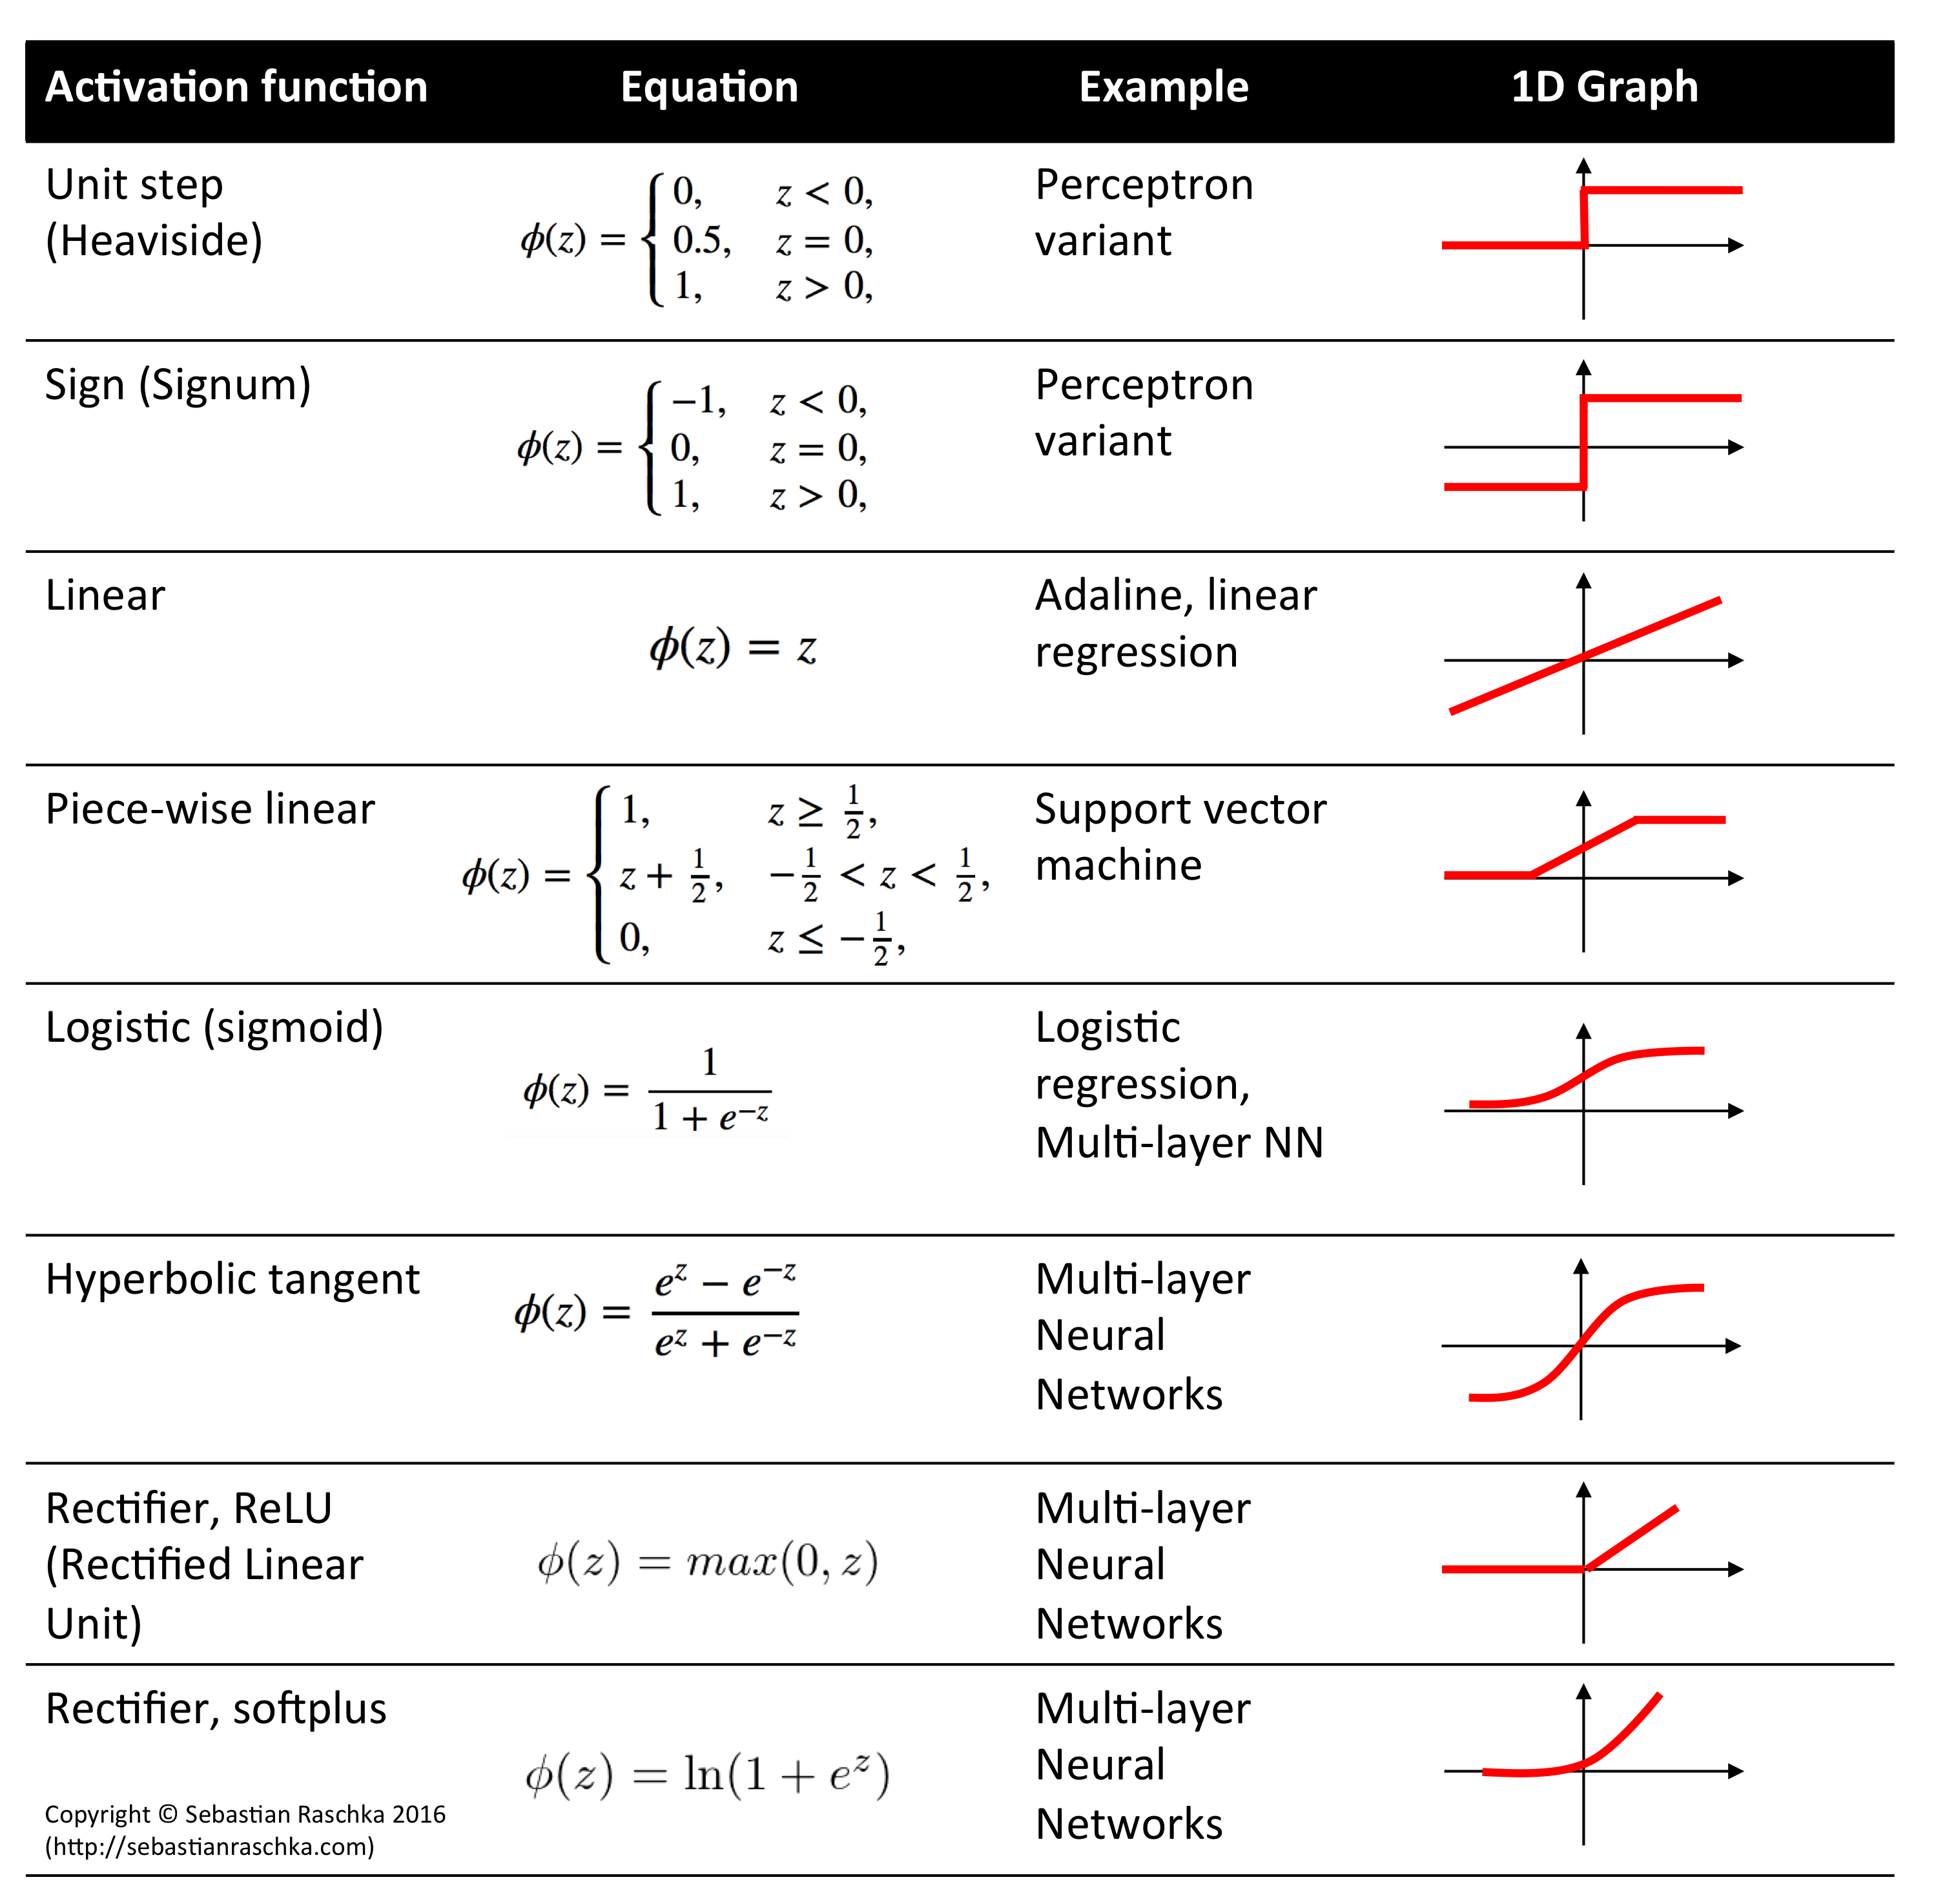

**Problem #2:** In the following, we fix a function and approximate it using a polynomial model as well as a neural network. Investigate the effects of the network architecture on the quality of the approximation. Discuss the pro's and con's of using each model.

In [2]:
# set the number of samples to take for each toy dataset
n_samples = 1000
# set the proportion of toy data to hold out for testing
test_size = 0.3
# set the random seed to make the experiment reproducible 
random_seed = 5153
np.random.seed(random_seed)

In [3]:
# define a function
f = lambda x: np.cos(np.sqrt(x))**2
# choose some points from the function - this is our toy dataset 
X = np.random.permutation(np.linspace(0, 50, n_samples))
Y = f(X)
# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


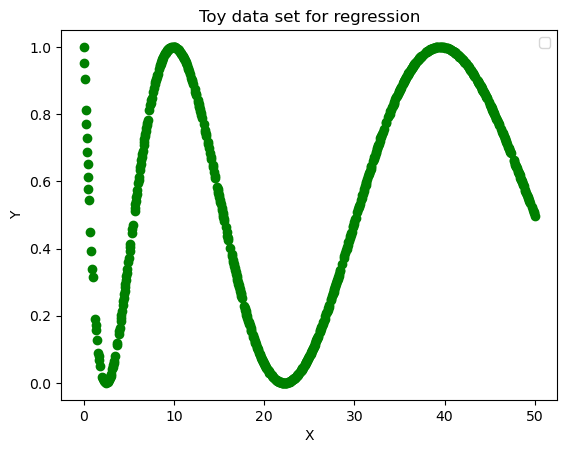

In [4]:
# plot the toy data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color='green')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy data set for regression')
plt.show()

Let's first fit a polynomial model to the toy data set. ***Here you should experiment with the degree of the polynomial and observe the effects this has on the fit.*** You want to think about issues like computational effeciency and generalizability of this type of modeling.

##### Polynomial model

In [5]:
# degree of the polynomial model - play around with this!
degree = 11
# add polynomial features to the data and fit a ridge regression model
simple_model = make_pipeline(PolynomialFeatures(degree), Ridge())
simple_model.fit(X_train.reshape((X_train.shape[0], 1)), Y_train)

/Users/isaacxiao/Documents/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.69344e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=11)),
                ('ridge', Ridge())])

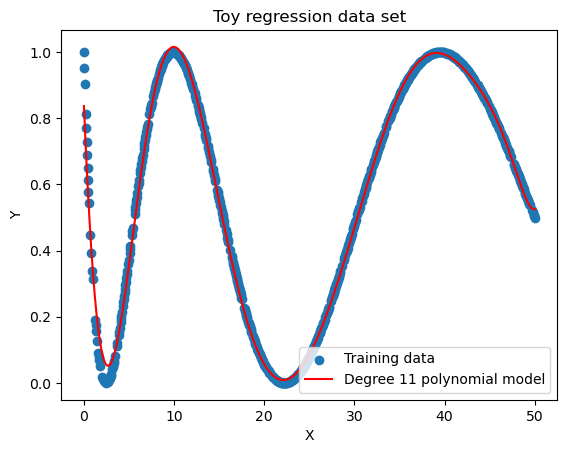

In [6]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500).reshape((500, 1))
y_pred = simple_model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='Degree ' + str(degree) + ' polynomial model')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

 As we increase the degree of the polynomial function, the performace of 'simple_model' increases significantly with polynomial degree=11 having the best fit. 

In [7]:
# evaluate the model
print('Train R2:', simple_model.score(X_train.reshape((X_train.shape[0], 1)), Y_train))
print('Test R2:', r2(Y_test, simple_model.predict(X_test.reshape((X_test.shape[0], 1)))))

Train R2: 0.9972054283579913
Test R2: 0.9969089401944498


Now let's fit a MLP network with a single hidden layer. Start with **sigmoid** or **hyperbolic-tan** activation functions for the hidden nodes and linear activation for the output. 

***Experiment with the number of hidden nodes and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. 

***Experiment with different activation functions and observe the effect of this on the quality of the fit.*** 

2. **Task 2**: Let us start with the configuration that H is 500 and the activation function is tanh

In [102]:
# number of hidden nodes
H = 500
# input dimension
input_dim = 1


# create sequential multi-layer perceptron
model = keras.models.Sequential()
# layer 0
# model.add(...) 
model.add(keras.layers.Dense(500,activation='tanh',input_dim=input_dim))

# layer 1
# model.add(...)
model.add(keras.layers.Dense(1,activation='sigmoid',input_dim=input_dim))

# configure the model
# model.compile(...)
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# number of hidden nodes
H = 500
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model = Sequential()

# layer 0 (input layer)
model.add(Dense(units=H, input_dim=input_dim, activation='relu'))

# layer 1 (output layer)
model.add(Dense(units=1, activation='linear'))

# configure the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

I chose activation='sigmoid' in the last hidden layer as it would give the best result since our y variable is a regression value between 0 and 1. Subsequently, other parameters were chosen as optimizer='rmsprop',loss='mse', metrics=['mae']. 

In [103]:
# fit the model
# model.fit(...)
model.fit(X_train, Y_train, epochs=600)

Epoch 1/600
22/22 [==============================] - 1s 733us/step - loss: 0.1242 - mae: 0.2971
Epoch 2/600
22/22 [==============================] - 0s 875us/step - loss: 0.1013 - mae: 0.2771
Epoch 3/600
22/22 [==============================] - 0s 884us/step - loss: 0.0936 - mae: 0.2666
Epoch 4/600
22/22 [==============================] - 0s 829us/step - loss: 0.0960 - mae: 0.2714
Epoch 5/600
22/22 [==============================] - 0s 878us/step - loss: 0.0874 - mae: 0.2583
Epoch 6/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0823 - mae: 0.2500
Epoch 7/600
22/22 [==============================] - 0s 705us/step - loss: 0.0769 - mae: 0.2432
Epoch 8/600
22/22 [==============================] - 0s 930us/step - loss: 0.0859 - mae: 0.2509
Epoch 9/600
22/22 [==============================] - 0s 836us/step - loss: 0.0733 - mae: 0.2343
Epoch 10/600
22/22 [==============================] - 0s 849us/step - loss: 0.0802 - mae: 0.2455
Epoch 11/600
22/22 [=====================

In [10]:
# Assuming you have X_train and y_train from your dataset
# model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

# Example:
num_epochs = 50
batch_size = 32
validation_split = 0.2  # 20% of training data will be used for validation

# Fitting the model
history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)


Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 0.5651 - mae: 0.5851 - val_loss: 0.1273 - val_mae: 0.2945
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1638 - mae: 0.3345 - val_loss: 0.1273 - val_mae: 0.2935
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1391 - mae: 0.3117 - val_loss: 0.1235 - val_mae: 0.2903
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1241 - mae: 0.2963 - val_loss: 0.1161 - val_mae: 0.2912
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1218 - mae: 0.2946 - val_loss: 0.1197 - val_mae: 0.2867
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1186 - mae: 0.2921 - val_loss: 0.1144 - val_mae: 0.2950
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.1147 - mae: 0.2924 - val_loss: 0.1118 - val_mae: 0.2846
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1139 - mae: 0.2

16/16 [==============================] - 0s 2ms/step


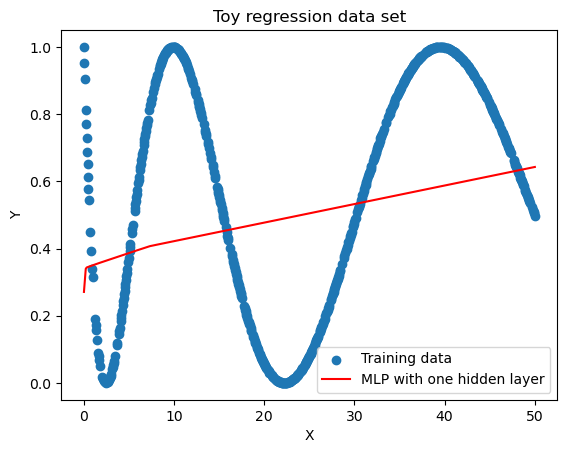

In [11]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='MLP with one hidden layer')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [12]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)


print('Train loss:', score)
print('Train R2:', r2(Y_train,model.predict(X_train)))

Train loss: [0.11406896263360977, 0.2985678017139435]
22/22 [==============================] - 0s 2ms/step
Train R2: 0.07047948820023164


In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

Test loss: [0.10147105902433395, 0.27792051434516907]
10/10 [==============================] - 0s 1ms/step
Test R2: 0.10217323019627234


3. **Task 3**: Experiment with the number of hidden nodes and observe the effect of this on the quality of the fit. 

The activation function is fixed to tanh. The grid of hidden nodes number is [10, 50, 100, 150, 300, 500]

The best fit is at hidden nodes number =50 as it has the highest test accuracy. 

Epoch 1/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2034 - mae: 0.3476
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1783 - mae: 0.3305
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1529 - mae: 0.3160
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1321 - mae: 0.3073
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1225 - mae: 0.3044
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1195 - mae: 0.3054
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1170 - mae: 0.3012
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1144 - mae: 0.2985
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1130 - mae: 0.2968
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1124 - mae: 0.2953
Epoch 11/500
22/22 [==============================] - 0s 2m

22/22 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 0.2095
Epoch 173/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0557 - mae: 0.2078
Epoch 174/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0556 - mae: 0.2083
Epoch 175/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0544 - mae: 0.2061
Epoch 176/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0544 - mae: 0.2058
Epoch 177/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0536 - mae: 0.2038
Epoch 178/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0535 - mae: 0.2046
Epoch 179/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0529 - mae: 0.2030
Epoch 180/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0527 - mae: 0.2021
Epoch 181/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0518 - mae: 0.2007
Epoch 182/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1047
Epoch 343/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.1037
Epoch 344/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1044
Epoch 345/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1030
Epoch 346/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1049
Epoch 347/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.1030
Epoch 348/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1032
Epoch 349/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.1037
Epoch 350/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1016
Epoch 351/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.1023
Epoch 352/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.1038 - mae: 0.2842
Epoch 12/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1032 - mae: 0.2842
Epoch 13/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1027 - mae: 0.2833
Epoch 14/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1019 - mae: 0.2825
Epoch 15/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1016 - mae: 0.2821
Epoch 16/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1012 - mae: 0.2811
Epoch 17/500
22/22 [==============================] - 0s 1ms/step - loss: 0.1007 - mae: 0.2803
Epoch 18/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1000 - mae: 0.2783
Epoch 19/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0989 - mae: 0.2779
Epoch 20/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0985 - mae: 0.2776
Epoch 21/500
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.1173
Epoch 183/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0207 - mae: 0.1163
Epoch 184/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1151
Epoch 185/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1151
Epoch 186/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1135
Epoch 187/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1131
Epoch 188/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1136
Epoch 189/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1130
Epoch 190/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1118
Epoch 191/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1104
Epoch 192/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0793
Epoch 353/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0809
Epoch 354/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0794
Epoch 355/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0798
Epoch 356/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0789
Epoch 357/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0790
Epoch 358/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0124 - mae: 0.0778
Epoch 359/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0128 - mae: 0.0804
Epoch 360/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0807
Epoch 361/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0128 - mae: 0.0812
Epoch 362/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0851 - mae: 0.2576
Epoch 22/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0850 - mae: 0.2579
Epoch 23/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0847 - mae: 0.2575
Epoch 24/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0848 - mae: 0.2577
Epoch 25/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0836 - mae: 0.2564
Epoch 26/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0830 - mae: 0.2547
Epoch 27/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0816 - mae: 0.2523
Epoch 28/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.2507
Epoch 29/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0819 - mae: 0.2529
Epoch 30/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0801 - mae: 0.2509
Epoch 31/500
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1062
Epoch 193/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1079
Epoch 194/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1066
Epoch 195/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.1015
Epoch 196/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.1078
Epoch 197/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1039
Epoch 198/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1046
Epoch 199/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1044
Epoch 200/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1031
Epoch 201/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1051
Epoch 202/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0785
Epoch 363/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0757
Epoch 364/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0801
Epoch 365/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0139 - mae: 0.0758
Epoch 366/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0788
Epoch 367/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0802
Epoch 368/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0785
Epoch 369/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0755
Epoch 370/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0807
Epoch 371/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0763
Epoch 372/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0773 - mae: 0.2445
Epoch 32/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0755 - mae: 0.2426
Epoch 33/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0747 - mae: 0.2410
Epoch 34/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0751 - mae: 0.2412
Epoch 35/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0726 - mae: 0.2374
Epoch 36/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0739 - mae: 0.2388
Epoch 37/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0738 - mae: 0.2382
Epoch 38/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0740 - mae: 0.2397
Epoch 39/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0714 - mae: 0.2363
Epoch 40/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0722 - mae: 0.2363
Epoch 41/500
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1039
Epoch 203/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1042
Epoch 204/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.1067
Epoch 205/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1029
Epoch 206/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1045
Epoch 207/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1031
Epoch 208/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1026
Epoch 209/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1017
Epoch 210/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1020
Epoch 211/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1036
Epoch 212/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0822
Epoch 373/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0795
Epoch 374/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0796
Epoch 375/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0820
Epoch 376/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0792
Epoch 377/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0795
Epoch 378/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0808
Epoch 379/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0151 - mae: 0.0804
Epoch 380/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0799
Epoch 381/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0786
Epoch 382/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0632 - mae: 0.2136
Epoch 42/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0632 - mae: 0.2145
Epoch 43/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0632 - mae: 0.2167
Epoch 44/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0615 - mae: 0.2115
Epoch 45/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0615 - mae: 0.2111
Epoch 46/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0645 - mae: 0.2181
Epoch 47/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0620 - mae: 0.2113
Epoch 48/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0597 - mae: 0.2087
Epoch 49/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0618 - mae: 0.2106
Epoch 50/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0588 - mae: 0.2062
Epoch 51/500
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.0357 - mae: 0.1424
Epoch 128/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0350 - mae: 0.1393
Epoch 129/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0368 - mae: 0.1449
Epoch 130/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0348 - mae: 0.1393
Epoch 131/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0364 - mae: 0.1436
Epoch 132/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0360 - mae: 0.1414
Epoch 133/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0356 - mae: 0.1401
Epoch 134/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0359 - mae: 0.1420
Epoch 135/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0355 - mae: 0.1421
Epoch 136/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0343 - mae: 0.1373
Epoch 137/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0965
Epoch 298/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.1035
Epoch 299/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1002
Epoch 300/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0971
Epoch 301/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.0986
Epoch 302/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0195 - mae: 0.1007
Epoch 303/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.0965
Epoch 304/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1018
Epoch 305/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.0950
Epoch 306/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0985
Epoch 307/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0974
Epoch 468/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.0911
Epoch 469/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.0964
Epoch 470/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0925
Epoch 471/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.0937
Epoch 472/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.0973
Epoch 473/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.0975
Epoch 474/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0168 - mae: 0.0903
Epoch 475/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.0952
Epoch 476/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.0971
Epoch 477/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0587 - mae: 0.2036
Epoch 53/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0550 - mae: 0.1979
Epoch 54/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0626 - mae: 0.2091
Epoch 55/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0576 - mae: 0.2012
Epoch 56/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0573 - mae: 0.1984
Epoch 57/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0551 - mae: 0.1964
Epoch 58/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0587 - mae: 0.2028
Epoch 59/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0550 - mae: 0.1956
Epoch 60/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0577 - mae: 0.1998
Epoch 61/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0555 - mae: 0.1953
Epoch 62/500
22/22 [==============================] - 0s 2ms/st

Epoch 138/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0370 - mae: 0.1449
Epoch 139/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0374 - mae: 0.1451
Epoch 140/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1397
Epoch 141/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.1403
Epoch 142/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0370 - mae: 0.1416
Epoch 143/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0375 - mae: 0.1451
Epoch 144/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0325 - mae: 0.1308
Epoch 145/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1398
Epoch 146/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0382 - mae: 0.1446
Epoch 147/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0332 - mae: 0.1326
Epoch 148/500
22/22 [===================

22/22 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1034
Epoch 309/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.0995
Epoch 310/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1079
Epoch 311/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.0980
Epoch 312/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.0958
Epoch 313/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.1012
Epoch 314/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1026
Epoch 315/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0207 - mae: 0.1050
Epoch 316/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.0975
Epoch 317/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.0977
Epoch 318/500
22/22 [==============================] -

22/22 [==============================] - 0s 2ms/step - loss: 0.0195 - mae: 0.0989
Epoch 479/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.0968
Epoch 480/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0984
Epoch 481/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.0954
Epoch 482/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.0981
Epoch 483/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.0991
Epoch 484/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0977
Epoch 485/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.0984
Epoch 486/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1003
Epoch 487/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.0940
Epoch 488/500
22/22 [==============================] -

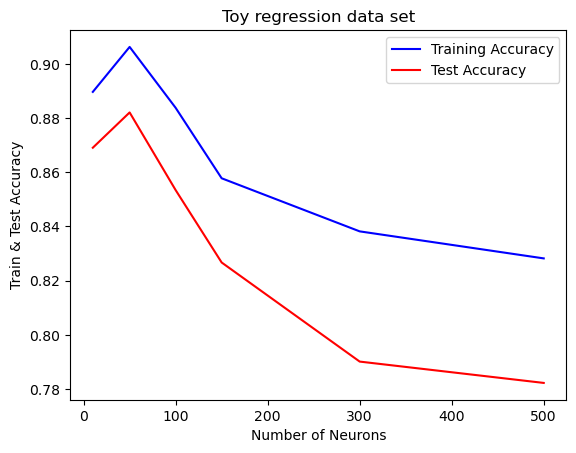

In [14]:
# Plot the train/test performace against the number of hidden nodes, H


# number of hidden nodes
H = [10, 50, 100, 150, 300, 500]

input_dim = 1
train=[]
test=[]


for nodes in H:

    model = keras.models.Sequential()

    model.add(keras.layers.Dense(nodes,activation='tanh',input_dim=input_dim))
    
    model.add(keras.layers.Dense(1,activation='sigmoid',input_dim=input_dim))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])



    model.fit(X_train, Y_train, epochs=500)


    train_acc=r2(Y_train,model.predict(X_train))
    test_acc=r2(Y_test, model.predict(X_test))
    train.append(train_acc)
    test.append(test_acc)




# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.plot(H, train, color='b',label='Training Accuracy')
ax.plot( H, test, color='r', label='Test Accuracy')
ax.legend(loc='best')
ax.set(ylabel='Train & Test Accuracy', xlabel='Number of Neurons', title='Toy regression data set')
plt.show()


4. **Task 4**: Experiment with different activation functions and observe the effect of this on the quality of the fit.
The hidden nodes number is fixed to 500. Try the following three different hidden activation functions: [linear, sigmoid, tanh]

Epoch 1/500
22/22 [==============================] - 0s 677us/step - loss: 0.1855 - mae: 0.3485
Epoch 2/500
22/22 [==============================] - 0s 608us/step - loss: 0.1550 - mae: 0.3276
Epoch 3/500
22/22 [==============================] - 0s 714us/step - loss: 0.1229 - mae: 0.3035
Epoch 4/500
22/22 [==============================] - 0s 736us/step - loss: 0.1487 - mae: 0.3276
Epoch 5/500
22/22 [==============================] - 0s 735us/step - loss: 0.1471 - mae: 0.3239
Epoch 6/500
22/22 [==============================] - 0s 828us/step - loss: 0.1439 - mae: 0.3188
Epoch 7/500
22/22 [==============================] - 0s 701us/step - loss: 0.1236 - mae: 0.3012
Epoch 8/500
22/22 [==============================] - 0s 720us/step - loss: 0.1258 - mae: 0.3029
Epoch 9/500
22/22 [==============================] - 0s 776us/step - loss: 0.1391 - mae: 0.3135
Epoch 10/500
22/22 [==============================] - 0s 711us/step - loss: 0.1385 - mae: 0.3111
Epoch 11/500
22/22 [===================

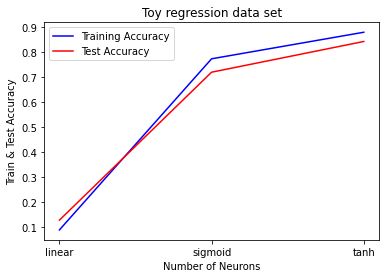

In [219]:
# Plot the train/test performace against these three activation functions

activations=['linear', 'sigmoid', 'tanh']


# input dimension
input_dim = 1
train=[]
test=[]


for activation in activations:
    model = keras.models.Sequential()
 
    model.add(keras.layers.Dense(500,activation=activation,input_dim =input_dim ))

    model.add(keras.layers.Dense(1,activation='sigmoid',input_dim =input_dim ))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])



    model.fit(X_train, Y_train, epochs=500)


    train_acc=r2(Y_train,model.predict(X_train))
    test_acc=r2(Y_test, model.predict(X_test))
    train.append(train_acc)
    test.append(test_acc)




fig, ax = plt.subplots()
ax.plot(activations, train, color='b',label='Training Accuracy')
ax.plot( activations, test, color='r', label='Test Accuracy')
ax.legend(loc='best')
ax.set(ylabel='Train & Test Accuracy', xlabel='Number of Neurons', title='Toy regression data set')
plt.show()


Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with sigmoid or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model as well as to the model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).



5. **Task 5**: Build the model that number of hidden nodes is 50. The number of hidden layers is 6. All non-linear activation functions are set to be tanh.

In [15]:
# number of hidden nodes
H = 50
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()
# layer 0
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 1
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 2
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 3
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 4
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 5
# model2.add(...) 
model2.add(keras.layers.Dense(H,activation='tanh'))

# layer 6
# model2.add(...) 
model2.add(keras.layers.Dense(1,activation='tanh'))

# configure the model
# model2.compile(...)
model2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])


In [108]:
# fit the model
# model2.fit(...)
model2.fit(X_train, Y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 820us/step - loss: 0.1986 - mae: 0.3644
Epoch 2/500
22/22 [==============================] - 0s 878us/step - loss: 0.1195 - mae: 0.2880
Epoch 3/500
22/22 [==============================] - 0s 985us/step - loss: 0.1177 - mae: 0.2945
Epoch 4/500
22/22 [==============================] - 0s 925us/step - loss: 0.1113 - mae: 0.2828
Epoch 5/500
22/22 [==============================] - 0s 921us/step - loss: 0.1119 - mae: 0.2811
Epoch 6/500
22/22 [==============================] - 0s 850us/step - loss: 0.1109 - mae: 0.2760
Epoch 7/500
22/22 [==============================] - 0s 870us/step - loss: 0.1141 - mae: 0.2821
Epoch 8/500
22/22 [==============================] - 0s 887us/step - loss: 0.0950 - mae: 0.2577
Epoch 9/500
22/22 [==============================] - 0s 939us/step - loss: 0.0834 - mae: 0.2465
Epoch 10/500
22/22 [==============================] - 0s 888us/step - loss: 0.0886 - mae: 0.2493
Epoch 11/500
22/22 [===================

In [17]:
# Reshape X_range to have two dimensions
X_range = X_range.reshape(-1, 1)

# Use the reshaped X_range for prediction
y_pred = model.predict(X_range)


16/16 [==============================] - 0s 2ms/step


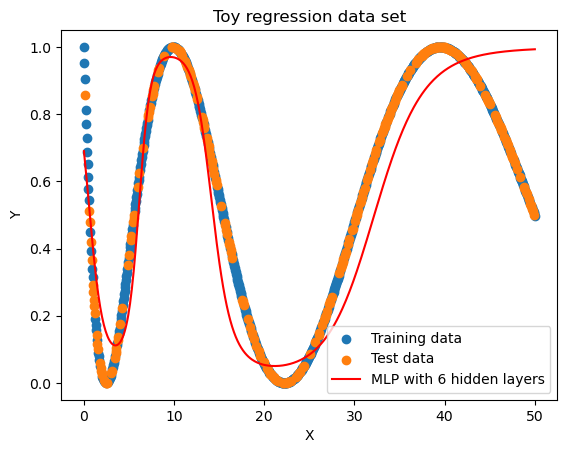

In [18]:
# Plot the model predictions against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.scatter(X_test, Y_test, label='Test data')
ax.plot(X_range, y_pred, color='r', label='MLP with 6 hidden layers')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()


In [31]:
# Reshape X_train for evaluation
X_train_reshaped = X_train.reshape(-1, 1)

# Get predictions
y_pred_train = model2.predict(X_train_reshaped)

# Calculate the mean squared error as the loss
loss = np.mean(np.square(Y_train - y_pred_train))

# Calculate R2 score
r2_value = r2(Y_train, y_pred_train)

# Print the results
print('Train loss:', loss)
print('Train R2:', r2_value)


22/22 [==============================] - 0s 2ms/step
Train loss: 0.38689484302223104
Train R2: -2.135208171963256


In [22]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [23]:
pip install --upgrade tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/92/2d/880fcd65e4414b05088193e6f2cfb86fdf90003dd2dd0f4d1bc465348f0e/tensorflow-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/6e/0c/1059a6682cf2cc1fcc0d5327837b5672fe4f5574255fa5430d0a8ceb75e9/tensorboard-2.15.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/b6/c8/2f823c8958d5342eafc6dd3e922f0cc4fcf8c2e0460284cc462dae3b60a0/tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Obtaining dependency information for

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 MB 6.0 MB/s eta 0:00:00:00:0100:01
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.0
    Uninstalling protobuf-4.25.0:
      Successfully uninstalled protobuf-4.25.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.

What if we wanted to approximate a different function $f$ with MLP's? ***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?

### Your answer

We can try and experiment a different non linear function with wide but shallow network and deep but narron networks for better understanding the role of hidden layers and nodes.

No handles with labels found to put in legend.


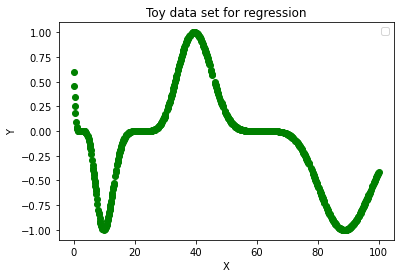

In [200]:
# define a function
f = lambda x: np.cos(np.sqrt(x))**5
# choose some points from the function - this is our toy dataset 
X = np.random.permutation(np.linspace(0, 100, n_samples))
Y = f(X)
# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)


# plot the toy data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color='green')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy data set for regression')
plt.show()

Example of deep but narron network:

In [201]:
# number of hidden nodes
H = 10
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()

model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(H,activation='tanh'))


model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(H,activation='tanh'))
model2.add(keras.layers.Dense(H,activation='tanh'))
model2.add(keras.layers.Dense(H,activation='tanh'))
model2.add(keras.layers.Dense(H,activation='tanh'))
model2.add(keras.layers.Dense(H,activation='tanh'))


model2.add(keras.layers.Dense(1,activation='linear'))

# configure the model
# model2.compile(...)
model2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

model2.fit(X_train, Y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 1ms/step - loss: 0.2904 - mae: 0.4253
Epoch 2/500
22/22 [==============================] - 0s 900us/step - loss: 0.2973 - mae: 0.4136
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2663 - mae: 0.3919
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2807 - mae: 0.4103
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2768 - mae: 0.4016
Epoch 6/500
22/22 [==============================] - 0s 968us/step - loss: 0.2656 - mae: 0.4007
Epoch 7/500
22/22 [==============================] - 0s 954us/step - loss: 0.2918 - mae: 0.4225
Epoch 8/500
22/22 [==============================] - 0s 990us/step - loss: 0.2842 - mae: 0.4165
Epoch 9/500
22/22 [==============================] - 0s 979us/step - loss: 0.2806 - mae: 0.4170
Epoch 10/500
22/22 [==============================] - 0s 984us/step - loss: 0.3015 - mae: 0.4219
Epoch 11/500
22/22 [===========================

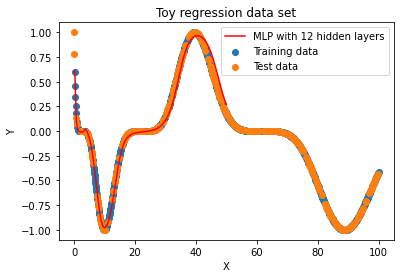

In [202]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model2.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.scatter(X_test, Y_test, label='Test data')
ax.plot(X_range, y_pred, color='r', label='MLP with 12 hidden layers')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [203]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))


score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

Train loss: [0.007285610772669315, 0.0657796785235405]
Train R2: 0.9734373899299676
Test loss: [0.009024552069604397, 0.07295418530702591]
Test R2: 0.9679636070044537


Now, example of a shallow but dense network

In [207]:
# number of hidden nodes
H = 1000
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()

model2.add(keras.layers.Dense(H,activation='tanh'))

model2.add(keras.layers.Dense(1500,activation='tanh'))

model2.add(keras.layers.Dense(1,activation='linear'))

# configure the model
# model2.compile(...)
model2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

model2.fit(X_train, Y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 11ms/step - loss: 354.3070 - mae: 10.1706
Epoch 2/500
22/22 [==============================] - 0s 12ms/step - loss: 0.4344 - mae: 0.4903
Epoch 3/500
22/22 [==============================] - 0s 11ms/step - loss: 0.7639 - mae: 0.6817
Epoch 4/500
22/22 [==============================] - 0s 11ms/step - loss: 1.4823 - mae: 0.9534
Epoch 5/500
22/22 [==============================] - 0s 12ms/step - loss: 0.8912 - mae: 0.7509
Epoch 6/500
22/22 [==============================] - 0s 12ms/step - loss: 0.6739 - mae: 0.6622
Epoch 7/500
22/22 [==============================] - 0s 12ms/step - loss: 0.8498 - mae: 0.7502
Epoch 8/500
22/22 [==============================] - 0s 12ms/step - loss: 0.6614 - mae: 0.6673
Epoch 9/500
22/22 [==============================] - 0s 12ms/step - loss: 0.7830 - mae: 0.7572
Epoch 10/500
22/22 [==============================] - 0s 12ms/step - loss: 0.8558 - mae: 0.7521
Epoch 11/500
22/22 [==========================

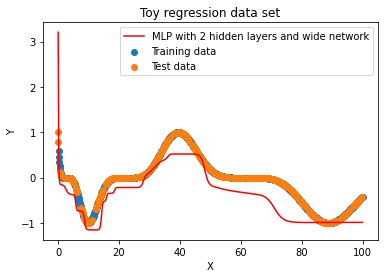

In [213]:
# use our model to predict in the range we want
X_range = np.linspace(0, 100, 500)
y_pred = model2.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.scatter(X_test, Y_test, label='Test data')
ax.plot(X_range, y_pred, color='r', label='MLP with 2 hidden layers and wide network')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [209]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))


score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

Train loss: [0.12070218473672867, 0.2984082102775574]
Train R2: 0.5599319821943667
Test loss: [0.13986386358737946, 0.30119258165359497]
Test R2: 0.5034953004903242


**To understand how deep but narrow and shallow but wide networks perform, I experimented with two non-linear functions including: f (degree 7) = lambda x: np.sin(np.sqrt(x))**7 , f (degree 5) = lambda x: np.cos(np.sqrt(x))**5 and f (degree 3) = lambda x: np.cos(np.sqrt(x))**3. So as to not make things complicated, we can only see the results for f = lambda x: np.cos(np.sqrt(x))**5 in this file and for simplification, I'd address deep but narrow network = "alpha" and shallow but wide network = "beta". 

**Both alpha and beta models performed equally well for f (degree 3) = lambda x: np.cos(np.sqrt(x))**3 polynomial, perhaps because of less complexity, so we'd ignore the results of this function and only compare degree 7 and degree 5 functions.

**To keep the Alpha model narrow, I kept the number of nodes at each layer fixated at 10 for each of the 12 hidden layers except last for which the number of node =1. However, I increased the number of nodes from 1000 to 1500 in the first 2 of the total 3 layers of the beta model to emphasize on the density of the network. I further kept activation functions same for both alpha and beta models for better comparison.

**Alpha model seems to outperform beta model by a large extent as test accuracy of alpha model for both non-linear functions (degree 7 and degree 5) is very good (greater than 96%) however test accuracy of the beta model for both non-linear functions (degree 7 and degree 5) is quite poor (less than 51%). 

**It would, however, be difficult to make a generalised statement for both alpha and beta models by experimenting with just degree 7 and degree 5 functions however, it seems clear that increasing the depth of the network is very important especially to capture the surprise elements in the function. The advantage of multiple layers is that features can be learned at different levels of abstraction. As the number of layers increases, the receptive field of each neuron relative to the previous layer becomes larger and larger. While the beta model could be better at remembering, meaning, it would recognise frequent patterns better but would perform worse at understanding new patterns. 
